<a href="https://colab.research.google.com/github/HSSangha/Machine_Learning_Demo/blob/main/Machine_learning_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import keras


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
print(tf.__version__)

2.8.0


In [ ]:
train_ds, val_ds, test_ds = tfds.load('plant_village', split=['train[:70%]', 'train[70%:75%]','train[75%:]'], shuffle_files=True, as_supervised=True)

In [ ]:
def augment(image, label):

    if tf.random.uniform((), minval=0, maxval=1) < 0.5:
        if tf.random.uniform((), minval=0, maxval=1) <= 0.8:
            image = tf.image.random_brightness(image, max_delta=0.2)
            image = tf.image.random_contrast(image, lower=0.3, upper=0.5)

        else:
          image = image
            # image = tf.image.rgb_to_grayscale(image)

    return image, label

def one_hot(image, label):

    label = tf.one_hot(label, depth=38)

    return image, label

In [ ]:
from matplotlib import test
train_ds = train_ds.map(augment)
train_ds = train_ds.map(one_hot)
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(buffer_size=38)
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# test_ds = test_ds.map(augment)
val_ds = val_ds.map(one_hot)
val_ds = val_ds.cache()
val_ds = val_ds.batch(32)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

test_ds = test_ds.map(one_hot)
test_ds = test_ds.cache()
example = test_ds.take(6)
test_ds = test_ds.batch(32)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)


(256, 256, 3)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(38,), dtype=float32)
(256, 256, 3)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(38,), dtype=float32)
(256, 256, 3)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(38,), dtype=float32)
(256, 256, 3)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(38,), dtype=float32)
(256, 256, 3)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(38,), dtype=float32)
(256, 256, 3)
tf.Tensor(
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], sh

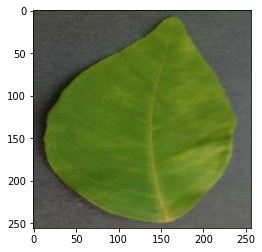

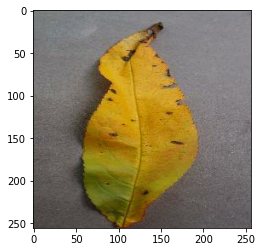

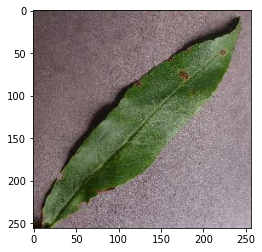

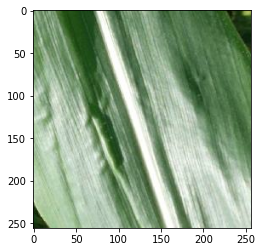

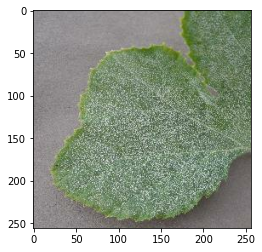

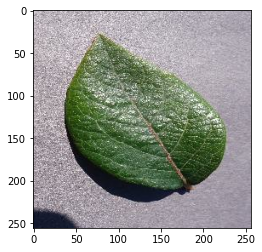

<Figure size 432x288 with 0 Axes>

In [ ]:
for exp in example:
  plt.imshow(exp[0])
  print(exp[0].shape)
  print(exp[1])
  plt.figure()

In [ ]:
builder = tfds.builder('plant_village')
info = builder.info

In [ ]:
print(info.features['label'].names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___

In [ ]:
print(info.features['label'].num_classes)

38


In [ ]:
print(info)

tfds.core.DatasetInfo(
    name='plant_village',
    version=1.0.2,
    description='The PlantVillage dataset consists of 54303 healthy and unhealthy leaf images
divided into 38 categories by species and disease.

NOTE: The original dataset is not available from the original source
(plantvillage.org), therefore we get the unaugmented dataset from a paper that
used that dataset and republished it. Moreover, we dropped images with
Background_without_leaves label, because these were not present in the original
dataset.

Original paper URL: https://arxiv.org/abs/1511.08060
Dataset URL: https://data.mendeley.com/datasets/tywbtsjrjv/1',
    homepage='https://arxiv.org/abs/1511.08060',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=38),
    }),
    total_num_examples=54303,
    splits={
        'train': 54303,
    },
    super

In [ ]:
from threading import active_count
model = keras.Sequential([
keras.layers.Conv2D(filters=50, kernel_size=4, strides=2, padding='same', activation='relu',
                    input_shape=(256, 256,3)),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Conv2D(filters=80, kernel_size=2,strides=2, padding='same', activation='relu'),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Conv2D(filters=100, kernel_size=2,strides=2, padding='same', activation='relu'),
keras.layers.MaxPooling2D(pool_size=2),
keras.layers.Dropout(0.3),
keras.layers.Flatten(),
keras.layers.Dense(256, activation='relu'),
keras.layers.Dense(38, activation ='softmax')])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 50)      2450      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 50)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 80)        16080     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 80)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 100)         32100     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 100)       

In [ ]:
history = model.fit(train_ds,epochs=12,validation_data=val_ds)

Epoch 1/12
1188/1188 [==============================] - 698s 587ms/step - loss: 1.9293 - accuracy: 0.4986 - val_loss: 0.8297 - val_accuracy: 0.7470
Epoch 2/12
1188/1188 [==============================] - 658s 554ms/step - loss: 1.0351 - accuracy: 0.6901 - val_loss: 0.6876 - val_accuracy: 0.7768
Epoch 3/12
1188/1188 [==============================] - 635s 535ms/step - loss: 0.8202 - accuracy: 0.7491 - val_loss: 0.5378 - val_accuracy: 0.8284
Epoch 4/12
1188/1188 [==============================] - 637s 536ms/step - loss: 0.7025 - accuracy: 0.7807 - val_loss: 0.5063 - val_accuracy: 0.8460
Epoch 5/12
1188/1188 [==============================] - 635s 534ms/step - loss: 0.6220 - accuracy: 0.8057 - val_loss: 0.3930 - val_accuracy: 0.8711
Epoch 6/12
1188/1188 [==============================] - 632s 532ms/step - loss: 0.5651 - accuracy: 0.8213 - val_loss: 0.4839 - val_accuracy: 0.8604
Epoch 7/12
1188/1188 [==============================] - 632s 532ms/step - loss: 0.5271 - accuracy: 0.8356 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


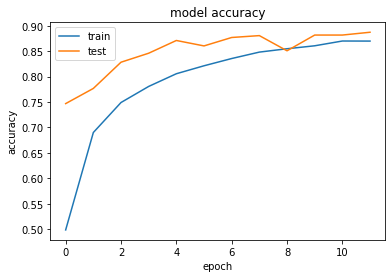

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

425/425 - 85s - loss: 0.3679 - accuracy: 0.8956 - 85s/epoch - 199ms/step


In [ ]:
print(test_acc)

0.8956246376037598


In [ ]:
final_test = test_ds.take(1)
predictions = model.predict(final_test)

In [ ]:
predictions.shape

(32, 38)

In [ ]:
label_names = info.features['label'].names

In [ ]:
predictions.shape

(32, 38)

Blueberry___healthy
Blueberry___healthy


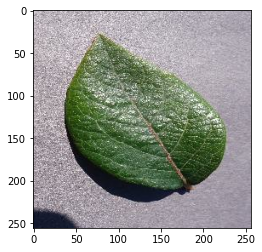

Soybean___healthy
Soybean___healthy


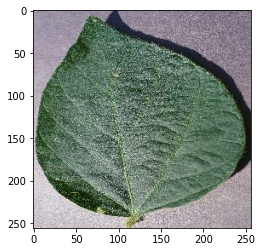

Raspberry___healthy
Raspberry___healthy


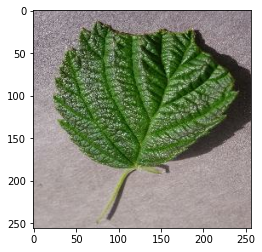

Tomato___Late_blight
Tomato___Late_blight


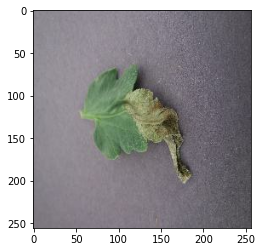

Tomato___Leaf_Mold
Tomato___Leaf_Mold


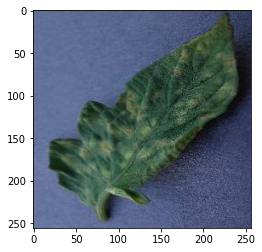

Grape___healthy
Tomato___Target_Spot


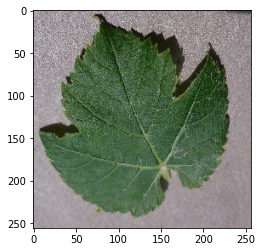

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


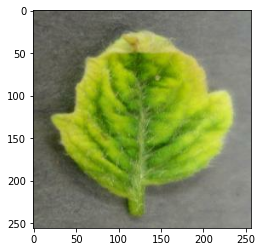

Blueberry___healthy
Blueberry___healthy


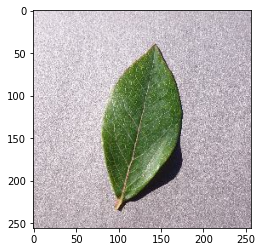

Squash___Powdery_mildew
Squash___Powdery_mildew


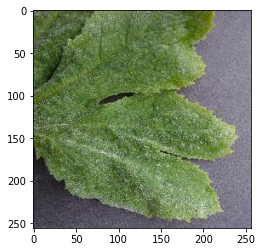

Tomato___Bacterial_spot
Potato___Early_blight


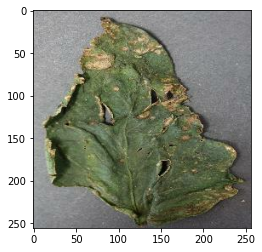

Tomato___Bacterial_spot
Tomato___Bacterial_spot


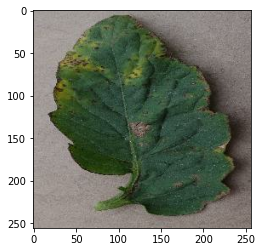

Grape___healthy
Grape___healthy


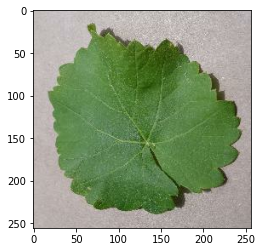

Corn___Common_rust
Corn___Common_rust


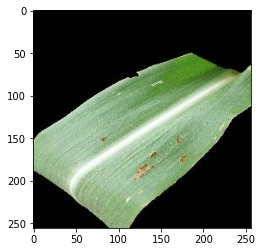

Blueberry___healthy
Blueberry___healthy


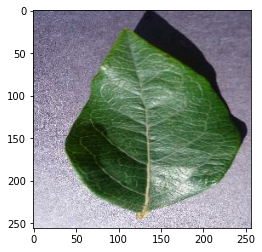

Soybean___healthy
Soybean___healthy


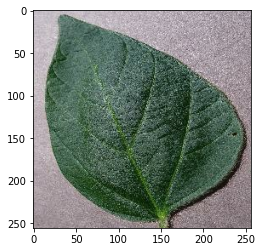

Corn___Common_rust
Corn___Common_rust


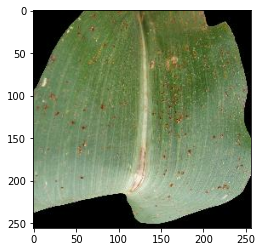

Orange___Haunglongbing_(Citrus_greening)
Orange___Haunglongbing_(Citrus_greening)


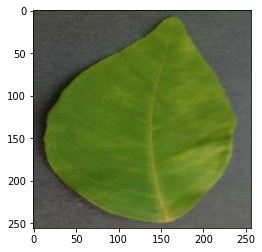

Peach___Bacterial_spot
Peach___Bacterial_spot


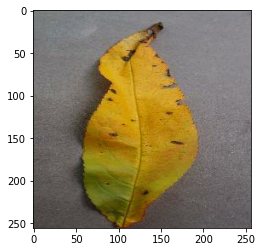

Peach___Bacterial_spot
Peach___Bacterial_spot


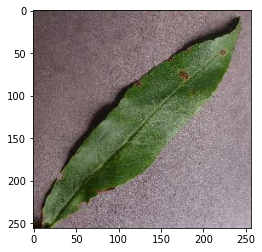

Corn___healthy
Corn___healthy


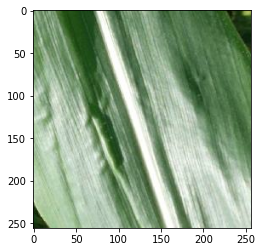

Squash___Powdery_mildew
Squash___Powdery_mildew


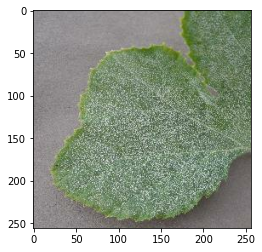

Cherry___Powdery_mildew
Blueberry___healthy


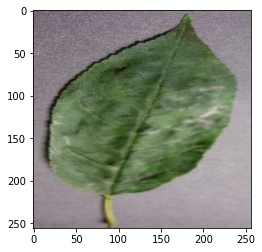

Pepper,_bell___healthy
Soybean___healthy


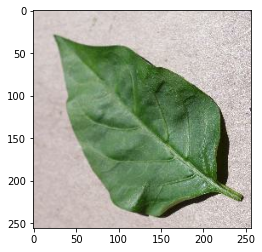

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


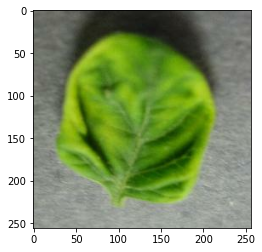

Apple___Black_rot
Apple___Black_rot


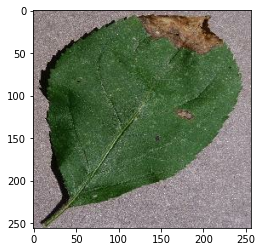

Potato___Late_blight
Potato___Late_blight


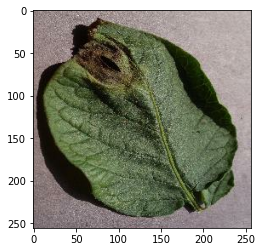

Grape___Black_rot
Grape___Black_rot


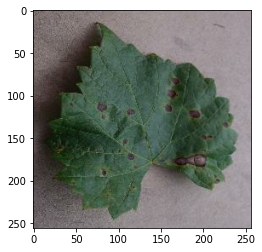

Tomato___Septoria_leaf_spot
Tomato___Target_Spot


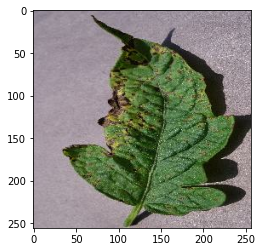

Grape___Esca_(Black_Measles)
Grape___Esca_(Black_Measles)


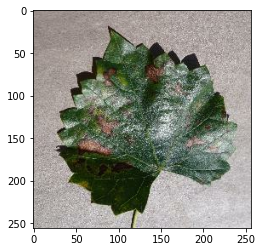

Apple___healthy
Apple___healthy


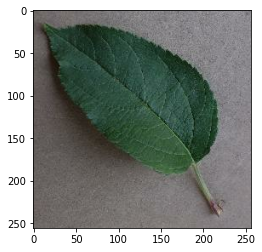

Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Tomato_Yellow_Leaf_Curl_Virus


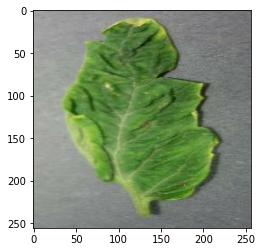

Tomato___Target_Spot
Tomato___Target_Spot


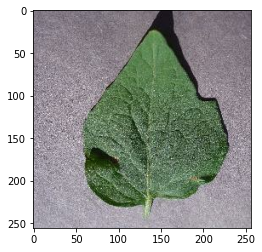

In [ ]:
i = 0
for ele in final_test:
    for i in range(len(ele[1])):
        plt.imshow(ele[0][i])
        print(label_names[np.argmax(ele[1][i])])
        print(label_names[np.argmax(predictions[i])])
        plt.show()
        

